### Some Notes on Weight Initialization

<center>![Figure 1 of "Imagenet classification with deep convolutional neural networks"](./pics/weights_krizhevsky.png  "Learning with Relu vs. Tanh")</center>

from     
A Krizhevsky, I Sutskever, GE Hinton, [Imagenet classification with deep convolutional neural networks](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf), Advances in neural information processing systems, 2012

Try different versions different initialization schema for tanh and relu. 

In [1]:
#non_linearity = "tanh"
non_linearity = "relu"
xavier = True
#xavier = False
weight_multyplier = 1.0   # only applies if xavier is = False
#weight_multyplier = 0.01 # only applies if xavier is = False



In [2]:
import numpy as np

In [3]:
D = np.random.randn(1000, 500)

In [4]:
hidden_layer_sizes = [500] * 10

In [5]:
act = {'relu': lambda x: np.maximum(0,x), 'tanh': lambda x: np.tanh(x)}

In [6]:
nonlinearities = [non_linearity] * len(hidden_layer_sizes)

In [7]:
Hs = {}

In [8]:
sigma_square = 4. # variance of the Gaussian
a = np.random.randn(10000) * np.sqrt(sigma_square)
print (np.var(a, ddof=1))
abs(sigma_square - np.var(a, ddof=1)) < 0.1

3.9891368944143353


True

The variance of the product between two independent variables is:

$$
{\rm Var}(XY) = E(X^2Y^2) − (E(XY))^2={\rm Var}(X){\rm Var}(Y)+{\rm Var}(X)(E(Y))^2+{\rm Var}(Y)(E(X))^2
$$

Goodman, Leo A., "On the exact variance of products," Journal of the American Statistical Association, December 1960, 708–713.

with zero-mean variables: 
$E(X) = E(Y) = 0$
this is

$$
{\rm Var}(XY) = {\rm Var}(X){\rm Var}(Y)
$$


#### Weight initialization by considering only the forward pass
- weight matrix $W$ consists of $m$ 
  - column vectors $\vec w_i$ (neuron weights for a hidden neuron $i$, $m$ hiddens for the layer in total)
  - each element was drawn from an IID Gaussian with variance $var(W)$.
- input vector of one example (also hidden vector) $\vec x^T$ with expected variance $var (X)$ 
- for random initialization there is no correlation between the input and the weights 
 - both should be approximatly zero-mean (through initialization resp. data proprocessing for $\vec x$)

So we use
 - $n$ is also called the "fan out" of a layer
 - $m$ is the "fan in" of a layer

Now we want that the variance remains constant, i.e. same variance for input and output in the linear regime. So the following expression should be 1:

$$
 \frac{\text{var}(\vec x^T \cdot \vec w_i)}{\text{var}(X)} = 
 \frac{\text{var} (\sum_{j=1}^n x_j  w_{ji})}{\text{var}(X)}=
 \frac{n {\ }\text{var}(X) \text{var}(W)}{\text{var}(X)} = 
 n {\ }\text{var}(W) = 1
$$


i.e.:
- var$(W) = 1/n$  
resp.
- std$(W) = 1/\sqrt n$  

With ReLu-Units only half of the units are in the acitive regime. So the variance of $W$ must be twice to yield the same effect, i.e.:
- var$(W) = 2/n$  
resp.
- std$(W) = \sqrt{2/n}$  

For training we do a forward pass and a backward pass. In the backward pass the error signal is ["linearly" backpropageted.](http://christianherta.de/lehre/dataScience/machineLearning/neuralNetworks/feedforwardNeuralNetworks.html).

[Glo10] suggest taking the average between forward and backward pass for initialization, i.e.:
- var$(W) = 2/(n + m)$  
resp.
- std$(W) = \sqrt{2/(n+m)}$

For ReLU's:
- var$(W) = 4/(n + m)$  
resp.
- std$(W) = \sqrt{4/(n+m)}$


In [9]:
for i in range(len(hidden_layer_sizes)):
    X = D if i==0 else Hs[i-1] # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    if not xavier:
        W = np.random.randn(fan_in, fan_out) * weight_multyplier
    else:
        if non_linearity == "relu":
            f = 2.
        else: 
            f = 1.
        W = np.random.randn(fan_in, fan_out) * np.sqrt(f/fan_in) 
        
    z = np.dot(X, W) 
    h = act[nonlinearities[i]](z)
    Hs[i] = h

In [10]:
print ("input layer had mean %f and std %f" % (np.mean(D), np.std(D)))

input layer had mean 0.001257 and std 1.001215


In [11]:
layer_means = [np.mean(H) for (i, H) in Hs.items()]

In [12]:
layer_std = [np.std(H) for (i, H) in Hs.items()]

In [13]:
for i, (m, s) in enumerate(zip(layer_means, layer_std)):
    print ("hidden layer %d had mean %.12f and std %.12f " % (i, m, s))

hidden layer 0 had mean 0.564394066373 and std 0.825768274254 
hidden layer 1 had mean 0.540605992550 and std 0.804607725807 
hidden layer 2 had mean 0.590131069974 and std 0.826514815907 
hidden layer 3 had mean 0.588340331095 and std 0.851526836559 
hidden layer 4 had mean 0.530806808285 and std 0.809978497904 
hidden layer 5 had mean 0.461513900536 and std 0.733096402225 
hidden layer 6 had mean 0.557053549166 and std 0.770071640719 
hidden layer 7 had mean 0.524762959966 and std 0.776026618880 
hidden layer 8 had mean 0.519240847545 and std 0.763189350844 
hidden layer 9 had mean 0.522487109007 and std 0.766517064885 


Text(0.5,1,'Layer Std')

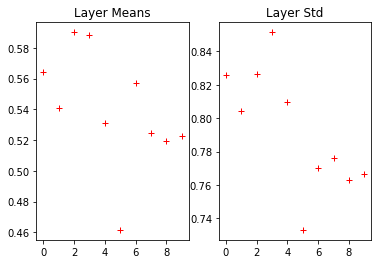

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(121)
plt.plot(list(Hs.keys()), layer_means,'r+')
plt.title('Layer Means')

plt.subplot(122)
plt.plot(list(Hs.keys()), layer_std,'r+')
plt.title('Layer Std')

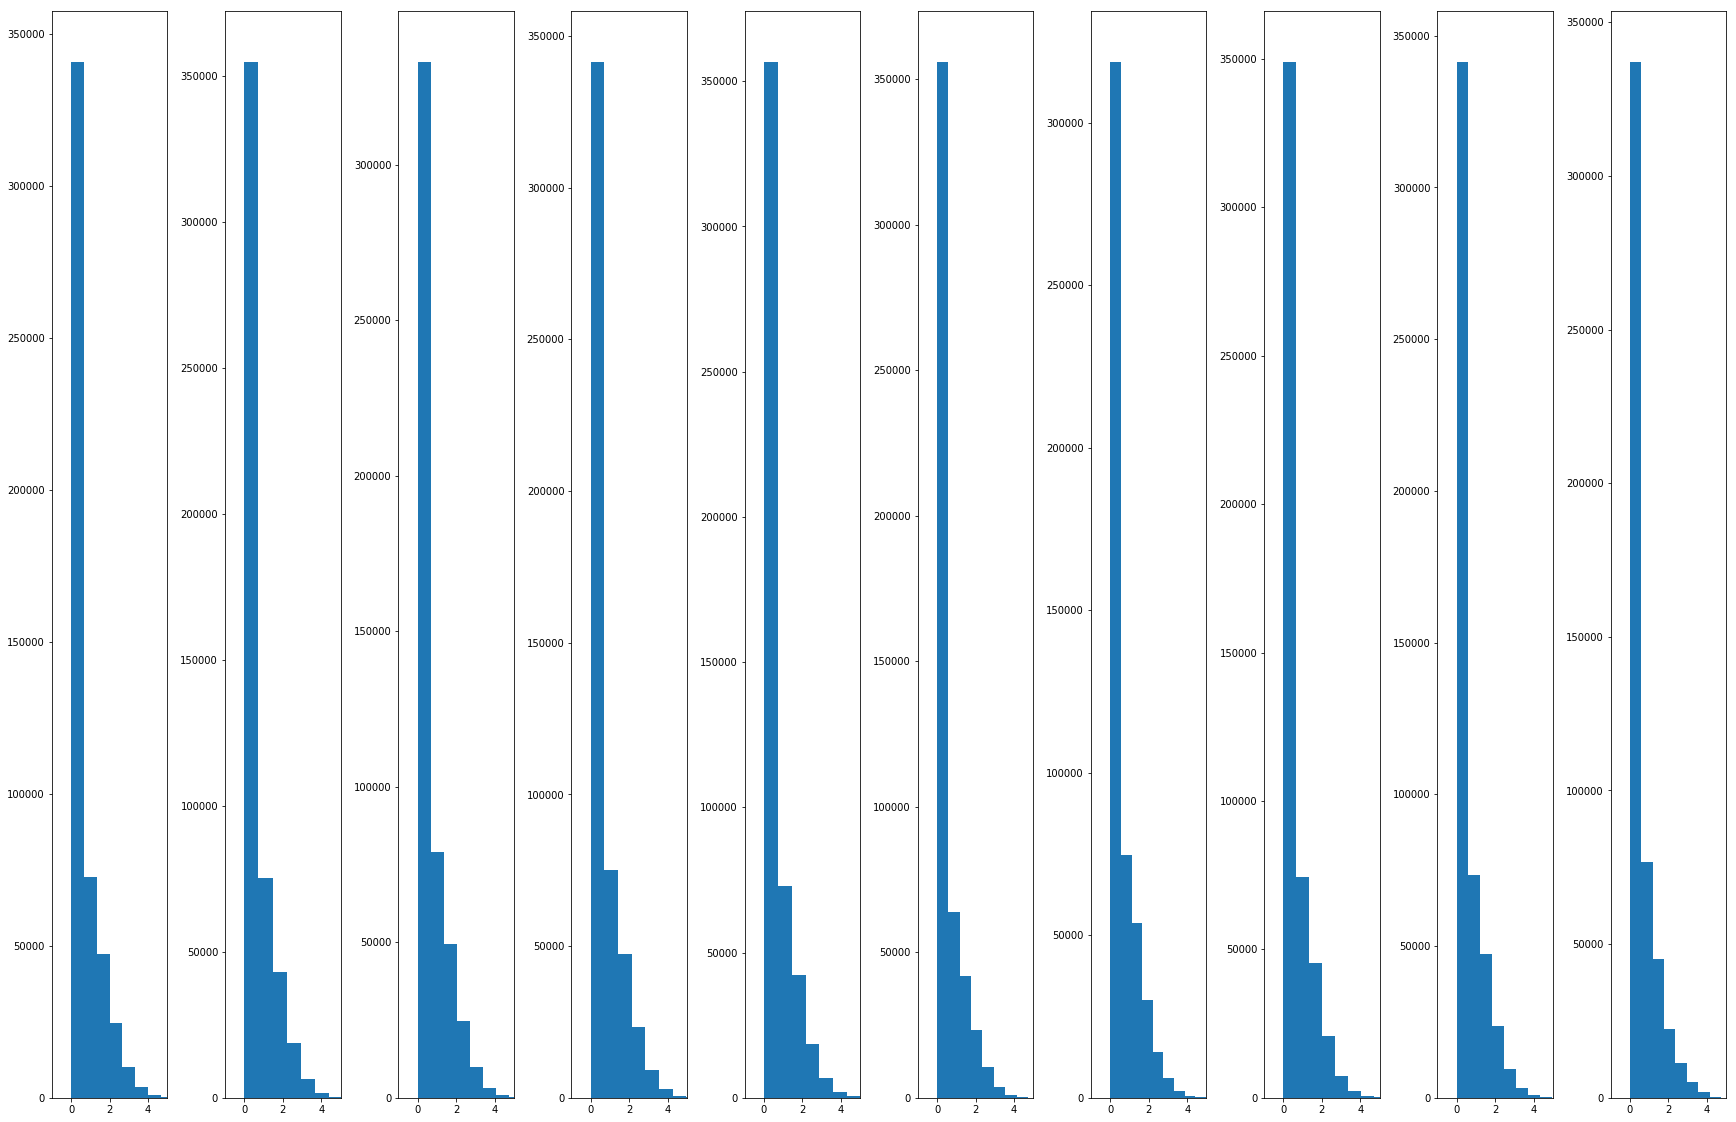

In [15]:
# plot the distributions
plt.figure(figsize=(30,20))
plt.subplots_adjust(wspace = 0.5)
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel())
    if non_linearity == 'relu':
        plt.xlim(-1,5) # for relu no upper bound for output!
    else:
        plt.xlim(-1,1)# for tanh
plt.savefig("weight_exp.png")
plt.show()

Literature:

- [Glo10] [X. Glorot, Y. Bengio: Understanding the difficulty of training deep feedforward neural networks, AISTATS 2010](http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf)
- [He15] [Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun: Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification](http://arxiv.org/abs/1502.01852), IEEE International Conference on Computer Vision (ICCV), 2015 

Link:
- [Blog Post by Gustav Larsson: Initialization of deep networks](http://deepdish.io/2015/02/24/network-initialization/)